# MNIST Handwritten Digit Recognition Using Neural Network from Scratch
>dataset link : https://www.kaggle.com/datasets/dillsunnyb11/digit-recognizer/data
<br><br>

<br>

### Importing Libraries

* `numpy` is used for numerical operations in Python.
* `pandas` is used for data manipulation and analysis.
* `matplotlib.pyplot` is used for creating visualizations.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

<br>

### Loading Data

- Data is loaded from the CSV file 'data/data.csv' using `pd.read_csv`.


In [2]:
data = pd.read_csv('data/data.csv')

<br>

### Displaying Training Data

- The `head()` method is used to display the first few rows of the training data (`data`).


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>

### Preprocessing Data

- Convert the entire dataset (`data`) to a NumPy array using `np.array()`.
- Get the dimensions of the dataset as `m` (number of examples) and `n` (number of features).
- Shuffle the dataset using `np.random.shuffle()` before splitting into test and training sets.
- Transpose the first 1000 examples of the shuffled dataset (`data_test`) and extract labels (`Y_test`) and features (`X_test`).
- Normalize the pixel values in `X_test` by dividing by 255.
- Transpose the remaining examples of the shuffled dataset (`data_train`) and extract labels (`Y_train`) and features (`X_train`).
- Normalize the pixel values in `X_train` by dividing by 255.
- Get the dimensions of the transposed training data as `_` (ignored variable) and `m_train` (number of examples in the training set).


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into test and training sets

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

<br>

### Training Labels

- `Y_train` contains the labels for the training examples.


In [5]:
Y_train

array([6, 4, 6, ..., 5, 0, 2], dtype=int64)

<br>

### Neural Network Functions

#### `init_params()`

- Initializes the parameters of the neural network.

#### `ReLU(Z)`

- Computes the Rectified Linear Unit (ReLU) activation function.

#### `softmax(Z)`

- Computes the softmax activation function.

#### `forward_prop(W1, b1, W2, b2, X)`

- Performs forward propagation through the neural network.

#### `ReLU_deriv(Z)`

- Computes the derivative of the ReLU activation function.

#### `one_hot(Y)`

- Converts the labels into one-hot encoded vectors.

#### `backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)`

- Performs backward propagation to compute the gradients of the parameters.

#### `update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)`

- Updates the parameters of the neural network using gradient descent.


In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

<br>

### Training Functions

#### `get_predictions(A2)`

- Computes the predictions of the neural network based on the output of the softmax layer.

#### `get_accuracy(predictions, Y)`

- Computes the accuracy of the predictions compared to the true labels.

#### `gradient_descent(X, Y, alpha, iterations)`

- Performs gradient descent to train the neural network parameters.


In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

<br>

### Training the Neural Network

- Call the `gradient_descent` function to train the neural network parameters (`W1`, `b1`, `W2`, `b2`) using the training data (`X_train`, `Y_train`), a learning rate of 0.10, and 500 iterations.


In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 0 0 ... 0 7 0] [6 4 6 ... 5 0 2]
0.10909756097560976
Iteration:  10
[4 0 4 ... 0 8 0] [6 4 6 ... 5 0 2]
0.18473170731707317
Iteration:  20
[4 0 9 ... 0 8 0] [6 4 6 ... 5 0 2]
0.2356341463414634
Iteration:  30
[4 0 0 ... 0 8 0] [6 4 6 ... 5 0 2]
0.27402439024390246
Iteration:  40
[3 4 4 ... 0 8 1] [6 4 6 ... 5 0 2]
0.31178048780487805
Iteration:  50
[3 4 4 ... 5 8 2] [6 4 6 ... 5 0 2]
0.3507073170731707
Iteration:  60
[7 4 4 ... 5 8 2] [6 4 6 ... 5 0 2]
0.391
Iteration:  70
[7 4 4 ... 5 8 2] [6 4 6 ... 5 0 2]
0.43617073170731707
Iteration:  80
[7 4 4 ... 5 8 2] [6 4 6 ... 5 0 2]
0.4801951219512195
Iteration:  90
[7 4 4 ... 5 0 2] [6 4 6 ... 5 0 2]
0.5172682926829268
Iteration:  100
[7 4 4 ... 5 0 2] [6 4 6 ... 5 0 2]
0.552
Iteration:  110
[7 4 4 ... 5 0 2] [6 4 6 ... 5 0 2]
0.5817073170731707
Iteration:  120
[7 4 4 ... 5 0 2] [6 4 6 ... 5 0 2]
0.6089268292682927
Iteration:  130
[9 4 4 ... 5 0 2] [6 4 6 ... 5 0 2]
0.6347317073170732
Iteration:  140
[9 4 4 ... 5 0 2] [6 4

<br>

### Prediction Functions

#### `make_predictions(X, W1, b1, W2, b2)`

- Makes predictions for the given input data using the trained neural network parameters.

#### `test_prediction(index, W1, b1, W2, b2)`

- Tests the prediction of the neural network for a specific example in the training dataset.


In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

<br>

### Testing Predictions

- Test the predictions of the trained neural network for specific examples in the training dataset using the `test_prediction` function.


Prediction:  [2]
Label:  2


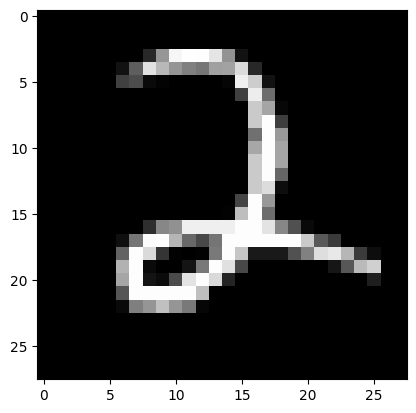

Prediction:  [1]
Label:  1


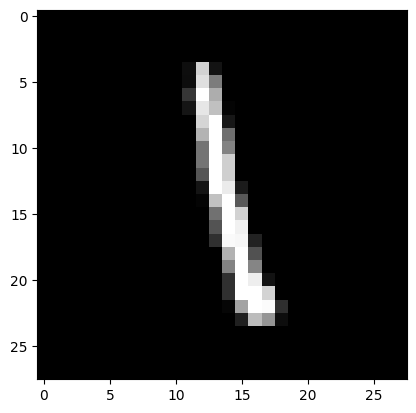

Prediction:  [0]
Label:  0


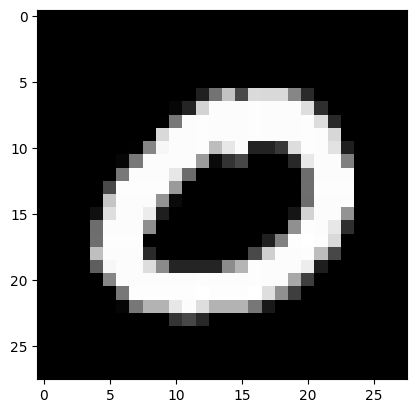

Prediction:  [6]
Label:  6


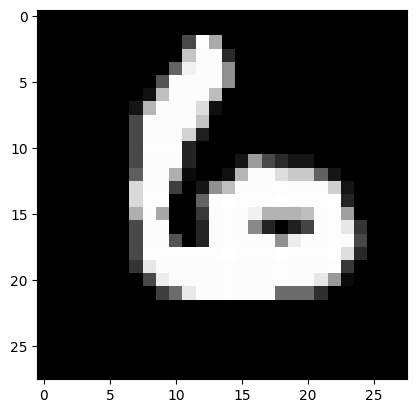

In [16]:
test_prediction(50, W1, b1, W2, b2)
test_prediction(150, W1, b1, W2, b2)
test_prediction(250, W1, b1, W2, b2)
test_prediction(330, W1, b1, W2, b2)

<br>

### Testing Predictions

- Compute the accuracy of the predictions made by the trained neural network on the testing dataset using the `get_accuracy` function.


In [11]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[3 6 5 9 2 0 1 6 6 2 7 4 1 0 0 2 3 3 1 4 9 0 8 4 7 2 7 3 4 0 4 4 6 8 5 2 2
 7 1 1 5 4 2 5 0 7 0 5 3 0 3 1 0 7 0 2 1 2 0 7 4 6 9 4 5 5 8 8 3 1 0 2 2 8
 7 8 1 2 5 9 7 0 5 5 9 1 0 3 0 6 4 3 5 1 1 2 0 9 5 8 9 4 4 6 1 8 7 1 7 7 3
 1 9 9 6 9 2 9 2 2 6 1 7 0 2 6 7 9 2 5 3 1 1 9 3 0 2 2 2 3 5 4 2 5 3 9 0 2
 8 4 8 1 3 2 2 2 3 2 9 5 4 8 0 8 2 1 6 1 3 2 9 7 3 9 6 2 0 9 5 1 7 8 3 4 9
 8 6 8 2 0 6 4 4 2 0 7 7 8 2 9 3 3 8 1 2 2 9 6 7 6 9 0 8 2 1 5 9 5 3 9 1 1
 1 3 3 8 8 4 1 1 5 1 6 8 8 4 5 8 1 9 7 7 5 4 4 0 3 2 2 4 5 6 6 7 1 0 0 6 8
 8 3 2 6 8 5 0 3 2 7 7 5 8 6 7 1 3 1 8 7 0 9 7 2 6 5 2 4 5 1 8 7 8 8 8 0 9
 2 4 7 8 5 0 7 3 9 9 6 0 7 6 6 8 7 3 2 4 5 1 2 0 4 3 1 2 6 8 7 3 0 3 8 3 2
 8 7 9 1 1 2 4 7 8 8 1 1 1 9 7 1 4 1 3 1 2 9 0 4 0 8 9 1 8 9 3 4 0 9 2 7 4
 3 5 8 5 6 3 0 5 4 9 1 5 7 2 7 1 7 3 5 4 4 7 3 8 9 0 0 0 9 4 6 4 7 1 3 0 9
 6 4 1 2 4 9 6 4 9 2 4 7 9 2 8 2 4 6 3 8 9 3 6 6 0 8 3 9 2 2 5 7 8 7 3 3 0
 9 4 6 6 1 8 1 7 4 5 6 2 6 3 7 3 9 6 8 2 6 1 6 2 2 1 2 0 0 2 8 6 4 4 1 7 1
 4 9 3 2 2 6 5 4 2 1 2 7 

0.85